In [8]:
# Imports
import numpy as np
import pandas as pd
import sklearn
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer

# Run Logistic Regression
#(Find a learning rate and a number of training iterations such that the
# model has fully converged to a solution)

diabetes_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_test = pd.read_csv('./data_A2/diabetes/diabetes_test.csv', index_col=False, sep=',', engine='python')
diabetes_train = pd.read_csv('./data_A2/diabetes/diabetes_train.csv', index_col=False, sep=',', engine='python')
diabetes_val = pd.read_csv('./data_A2/diabetes/diabetes_val.csv', index_col=False, sep=',', engine='python')

/var/folders/jx/y0pzll5x2hsc8kpymwzr1vz00000gr/T/ipykernel_25273/1069342386.py:2: RuntimeWarning: overflow encountered in exp
  logistic = lambda z: 1./ (1 + np.exp(-z))


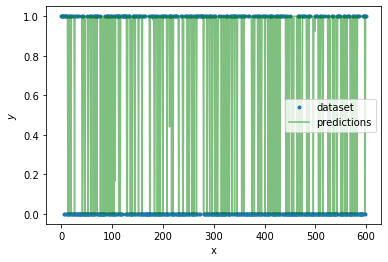

In [10]:
# Given implementations
logistic = lambda z: 1./ (1 + np.exp(-z))   
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient    

x, y = diabetes_train.iloc[:,:-1].to_numpy(), diabetes_train.iloc[:,-1].to_numpy()

model = LogisticRegression()

yh = model.fit(x,y).predict(x)

n = list(range(0, 600))
plt.plot(n, y, '.', label='dataset')
plt.plot(n, yh, 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'$y$')
plt.legend()
plt.show()